<h1>Embeddings</h1>

This notebook was used to practice practical applications of word embeddings for deep learning.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('movie_review.csv', encoding='utf-8')
df.head()

,review,sentiment
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1


In [94]:
df.shape

(50000, 2)

<b>Note</b>: This dataset is contains 25000 polar movie reviews for training and 25000 for testing. The sentiments are labelled as 1 for positive sentiment or 0 for negative sentiment.

<h3>Check the length of reviews for later use in the embeddings</h3>

In [62]:
all_reviews = df['review'].values

In [86]:
review_lengths = [len(review.split()) for review in vocab]    

In [87]:
max(review_lengths)

2470

In [88]:
np.mean(review_lengths)

231.15694

In [89]:
np.std(review_lengths)

171.3422838351246

In [90]:
np.median(review_lengths)

173.0

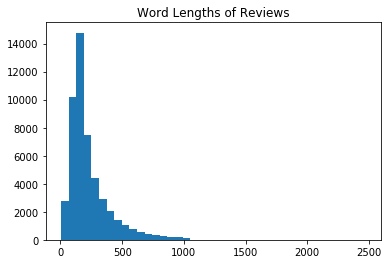

In [108]:
import matplotlib.pyplot as plt

plt.hist(review_lengths, bins=40)  # arguments are passed to np.histogram
plt.title("Word Lengths of Reviews")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0xb8782af98>,
 'caps': [<matplotlib.lines.Line2D at 0xb87836668>,
 'boxes': [<matplotlib.lines.Line2D at 0xb8782ae48>],
 'medians': [<matplotlib.lines.Line2D at 0xb87836cf8>],
 'fliers': [<matplotlib.lines.Line2D at 0xb8783f080>],
 'means': []}

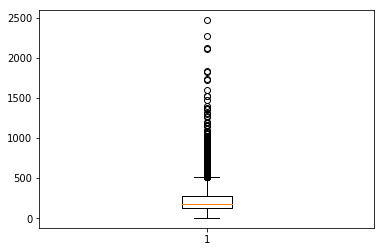

In [93]:
plt.boxplot(review_lengths)

<b>Result</b>
Notice that the majority of the reviews contain less than 250 words. We will use this value later on when we pad / clip our reviews for training. 

In [4]:
vocab = df['review'].values

In [5]:
vocab.shape

(50000,)

In [6]:
x_train = df.loc[:24999, 'review'].values
y_train = df.loc[:24999, 'sentiment'].values
x_test = df.loc[25000:, 'review'].values
y_test = df.loc[25000:, 'sentiment'].values

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [102]:
x_train_reviews = [len(x.split()) for x in x_train]

In [103]:
len(x_train_reviews)

25000

In [104]:
max(x_train_reviews)

2278

In [105]:
np.mean(x_train_reviews)

228.52668

In [106]:
np.std(x_train_reviews)

168.88031504049727

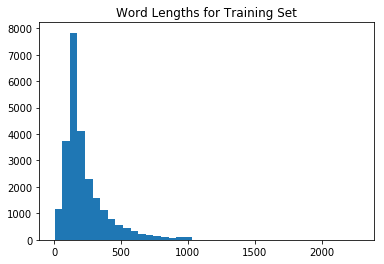

In [109]:
plt.hist(x_train_reviews, bins=40)  # arguments are passed to np.histogram
plt.title("Word Lengths for Training Set")
plt.show()

<b>Check</b>: Wanted to double check that the training data shared similar characteristics to the overall dataset. It seems that they are so we can proceed.

In [8]:
np.unique(y_train)

array([0, 1])

In [9]:
np.bincount(y_test)

array([12500, 12500])

In [10]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


<b>Note</b> Although we saw that the mean word length is 230, our model had trouble training properly. As such I tried a smaller max_len value and with max_len = 80, the model's accuracy improved significantly.

In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(vocab)

# max_len = max([len(s.split()) for s in vocab])
max_len = 80

vocab_size = len(tokenizer.word_index) + 1

x_train_tokens = tokenizer.texts_to_sequences(x_train)
x_test_tokens = tokenizer.texts_to_sequences(x_test)

x_train_pad = pad_sequences(x_train_tokens, maxlen = max_len, padding = 'post')
x_test_pad = pad_sequences(x_test_tokens, maxlen = max_len, padding = 'post')


In [13]:
print(max_len)
print(len(x_train_pad[0]))
print(len(x_train_pad[1]))

80
80
80


In [14]:
x_train_pad.shape

(25000, 80)

In [15]:
y_train.shape

(25000,)

Now we've tokenized all the words in the movie reviews dataset. This means that every word is now identifiable by an index. This makes it possible to train for word embeddings. We've padded each sentence so that they will all be of the same length.

<b>Note</b>: The embedding layer requires the vocab size, dimension of the dense embedding and we will be using input_length

<h2>Model</h2>

In [16]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM, GRU
from keras.layers.embeddings import Embedding

In [17]:
EMBEDDING_DIM = 100

model = Sequential()
model.add(Embedding(vocab_size, EMBEDDING_DIM, input_length=max_len))
model.add(GRU(units=32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 80, 100)           12425300  
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                12768     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 12,438,101
Trainable params: 12,438,101
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(x_train_pad, y_train, batch_size=128, epochs=25, validation_data=(x_test_pad, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 25000 samples
Epoch 1/25
25000/25000 [==============================] - 262s 10ms/step - loss: 0.5505 - acc: 0.7092 - val_loss: 0.4565 - val_acc: 0.7871
Epoch 2/25
25000/25000 [==============================] - 188s 8ms/step - loss: 0.3409 - acc: 0.8609 - val_loss: 0.4286 - val_acc: 0.8084
Epoch 3/25
25000/25000 [==============================] - 191s 8ms/step - loss: 0.2408 - acc: 0.9074 - val_loss: 0.4464 - val_acc: 0.8130
Epoch 4/25
25000/25000 [==============================] - 205s 8ms/step - loss: 0.1763 - acc: 0.9374 - val_loss: 0.4920 - val_acc: 0.8081
Epoch 5/25
25000/25000 [==============================] - 186s 7ms/step - loss: 0.1246 - acc: 0.9572 - val_loss: 0.5457 - val_acc: 0.8040
Epoch 6/25
16640/25000 [==================>...........] - ETA: 58s - loss: 0.0837 - acc: 0.9724

KeyboardInterrupt: 

In [20]:
test1 = "this is a new sentence"
test2 = "I hate you"
test3 = "I love you"

test_sample = [test1, test2, test3]

test_samples_tokens = tokenizer.texts_to_sequences(test_sample)
test_samples_tokens_pad = pad_sequences(test_samples_tokens, maxlen=max_len, padding='post')

In [21]:
test_samples_tokens_pad

array([[  11,    6,    3,  168, 3645,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [  10,  737,   22,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           

In [22]:
model.predict(x=test_samples_tokens_pad)

array([[0.9650962 ],
       [0.9647652 ],
       [0.97078216]], dtype=float32)

In [25]:
scores = model.evaluate(x_test_pad, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

25000/25000 [==============================] - 48s 2ms/step
Accuracy: 79.73%


In [26]:
embeddings = model.layers[0].get_weights()[0]

word_embeddings = {w:embeddings[index] for w, index in tokenizer.word_index.items()}

In [27]:
def cosine_similarity(emb1, emb2):
    numerator = np.dot(emb1, emb2)
    norm_emb1 = np.sqrt(np.dot(emb1, emb1))
    norm_emb2 = np.sqrt(np.dot(emb2, emb2))
    cosine_sim = np.divide(numerator, norm_emb1*norm_emb2)
    
    return cosine_sim

In [61]:
# test our word embeddings using cosine similarity

print("hero, villain:  %f" %(cosine_similarity(word_embeddings['hero'], word_embeddings['villain'])))
print("love, hate:  %f" %(cosine_similarity(word_embeddings['love'], word_embeddings['hate'])))
print("fantastic, wonderful:  %f" %(cosine_similarity(word_embeddings['fantastic'], word_embeddings['wonderful'])))
print("beautiful, ugly:  %f" %(cosine_similarity(word_embeddings['beautiful'], word_embeddings['ugly'])))
print("great, horrible:  %f" %(cosine_similarity(word_embeddings['great'], word_embeddings['horrible'])))
print("evil, monster:  %f" %(cosine_similarity(word_embeddings['evil'], word_embeddings['monster'])))
print("evil, villain:  %f" %(cosine_similarity(word_embeddings['evil'], word_embeddings['villain'])))


hero, villain:  -0.379964
love, hate:  -0.107931
fantastic, wonderful:  0.791935
beautiful, ugly:  -0.487247
great, horrible:  -0.712698
evil, monster:  0.301039
evil, villain:  -0.309882


<b>Self trained word embeddings:</b>
After just a few epochs it seems like the model has learned some relations between words. It is more confident in adjectives which is probably due to the training data provided. For regular nouns it is not as accurate. Thus, it seems it is more viable to start with some pre-trained embeddings than to learn them from scratch on this inbalanced dataset.

<h2>Try loading in pre-trained word embeddings</h2>

<p>We will be using Genism's implementation of Word2Vec. We need to format our reviews so that it is trainable by their algorithm.</p>

In [34]:
import string 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [49]:
cleaned_reviews = list()

reviews = df['review'].values.tolist()

stop_words = set(stopwords.words('english'))
punc_table = str.maketrans('', '', string.punctuation)

for review in reviews:
    tokens = word_tokenize(review)
    tokens = [w.lower() for w in tokens]
    stripped = [w.translate(punc_table) for w in tokens]
    words = [word for word in stripped if word.isalpha()]
    words = [w for w in words if not w in stop_words]
    cleaned_reviews.append(words)

In [50]:
len(cleaned_reviews)

50000

In [51]:
cleaned_reviews[0]

['went',
 'saw',
 'movie',
 'last',
 'night',
 'coaxed',
 'friends',
 'mine',
 'admit',
 'reluctant',
 'see',
 'knew',
 'ashton',
 'kutcher',
 'able',
 'comedy',
 'wrong',
 'kutcher',
 'played',
 'character',
 'jake',
 'fischer',
 'well',
 'kevin',
 'costner',
 'played',
 'ben',
 'randall',
 'professionalism',
 'sign',
 'good',
 'movie',
 'toy',
 'emotions',
 'one',
 'exactly',
 'entire',
 'theater',
 'sold',
 'overcome',
 'laughter',
 'first',
 'half',
 'movie',
 'moved',
 'tears',
 'second',
 'half',
 'exiting',
 'theater',
 'saw',
 'many',
 'women',
 'tears',
 'many',
 'full',
 'grown',
 'men',
 'well',
 'trying',
 'desperately',
 'let',
 'anyone',
 'see',
 'crying',
 'movie',
 'great',
 'suggest',
 'go',
 'see',
 'judge']

genism's Word2Vec requires sentences - list of lists of tokens, size which is the embedding dim size, window - distance between current and predicted words within a sentence, min_count - how many occurences required

In [56]:
import gensim 

model = gensim.models.Word2Vec(sentences = cleaned_reviews, size=EMBEDDING_DIM, window=5, min_count=1)

words = list(model.wv.vocab)

print(len(words))

134121


In [94]:
model.wv.most_similar("stephen")

[('dorff', 0.8209315538406372),
 ('edgar', 0.8183038830757141),
 ('lear', 0.7838637828826904),
 ('timothy', 0.7785831689834595),
 ('samuel', 0.7767901420593262),
 ('leonard', 0.7743215560913086),
 ('arthur', 0.7678720355033875),
 ('l', 0.7671722173690796),
 ('burroughs', 0.76711106300354),
 ('avery', 0.7669883966445923)]

In [83]:
model.wv.most_similar_cosmul(positive=['love', 'beautiful'], negative=['woman'])


[('fantastic', 1.1092069149017334),
 ('wonderful', 1.108721137046814),
 ('gershwyn', 1.0737359523773193),
 ('seenjust', 1.0718988180160522),
 ('amazing', 1.0539801120758057),
 ('eversoshort', 1.0534483194351196),
 ('richlycoloured', 1.0502643585205078),
 ('lessthensuccessful', 1.0319212675094604),
 ('jungleadventure', 1.029566764831543),
 ('faield', 1.0271861553192139)]

In [100]:
model.wv.doesnt_match("chocolate candy salad movie".split())

'movie'

<h3>Save our embeddings</h3>

In [61]:
filename = 'imdb_embedding_word2vec.txt'
model.wv.save_word2vec_format(filename, binary=False)

<h3>Load pretraind embeddings</h3>

In [63]:
import os

embeddings_index = {}

f = open(os.path.join('', 'imdb_embedding_word2vec.txt'), encoding="utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:]) # asarray converts its input into an array
    embeddings_index[word] = coefs

f.close()


In [67]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(cleaned_reviews)
sequences = tokenizer.texts_to_sequences(cleaned_reviews)

word_index = tokenizer.word_index

In [74]:
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

for word, i in word_index.items():
    if i > num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

<h3>Now we just need to load our embeddings into the model and learn</h3>

In [101]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, LSTM
from keras.layers.embeddings import Embedding
from keras.initializers import Constant

In [105]:
model = Sequential()

embedding_layer = Embedding(num_words, EMBEDDING_DIM, embeddings_initializer=Constant(embedding_matrix), input_length=max_len, trainable=False)
model.add(embedding_layer)
model.add(GRU(units=32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [106]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 2470, 100)         13412200  
_________________________________________________________________
gru_3 (GRU)                  (None, 32)                12768     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 13,425,001
Trainable params: 12,801
Non-trainable params: 13,412,200
_________________________________________________________________


In [108]:
review_pad = pad_sequences(sequences, maxlen=max_len)
sentiment = df['sentiment'].values

In [121]:
VALIDATION_SPLIT = 0.2

# this shuffles the dataset
indices = np.arange(review_pad.shape[0])
np.random.shuffle(indices)
review_pad = review_pad[indices]
sentiment = sentiment[indices]

num_validation_samples = int(VALIDATION_SPLIT * review_pad.shape[0])

x_train_pad = review_pad[:-num_validation_samples]
y_train_pad = sentiment[:-num_validation_samples]
x_test_pad = review_pad[-num_validation_samples:]
y_test_pad = sentiment[-num_validation_samples:]

In [122]:
print(x_train_pad.shape)
print(y_train_pad.shape)
print(x_test_pad.shape)
print(y_test_pad.shape)

(40000, 2470)
(40000,)
(10000, 2470)
(10000,)


In [123]:
model.fit(x_train_pad, y_train_pad, batch_size=128, epochs=25, validation_data=(x_test_pad, y_test_pad))

Train on 40000 samples, validate on 10000 samples
Epoch 1/25
 1152/40000 [..............................] - ETA: 1:15:06 - loss: 0.7257 - acc: 0.5312

KeyboardInterrupt: 

<h2>Conclusion</h2>

In this notebook I covered learning a word embedding while training a network on a sentiment classification. Then I tried loading a pre-trained embedding and then training it with the IMDB reviews word vocabulary. Finally, I used this pre-trained embedding for my embedding layer of my neural network. 